In [167]:
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 1 (2 pkt.)

Napisz funkcję **gen(a,b,p)**, która generuje listę punktów reprezentujących krzywą eliptyczną nad $\mathbb{Z}_p$ o równaniu $y^2=(x^3+ax+b)\mod p$.

In [168]:

def gen(a,b,p):
    # Znajdź wszystkie punkty na krzywej eliptycznej
    points = [] # lista punktów
    for x in range(p): # dla każdego x od 0 do p-1
        y2 = (x**3 + a*x + b) % p # oblicz y^2 zgodnie z równaniem
        for y in range(p): # dla każdego y od 0 do p-1
            if (y**2) % p == y2: # sprawdź, czy y jest pierwiastkiem kwadratowym z y^2
                points.append([x, y]) # dodaj punkt (x, y) do listy
    return points


In [169]:
print(gen(-1,0,7)==[[0, 0], [1, 0], [4, 2], [4, 5], [5, 1], [5, 6], [6, 0]])
print(gen(-1,0,11)==[[0, 0], [1, 0], [4, 4], [4, 7], [6, 1], [6, 10], [8, 3], [8, 8], [9, 4], [9, 7], [10, 0]])
print(gen(-1,1,7)==[[0, 1], [0, 6], [1, 1], [1, 6], [2, 0], [3, 2], [3, 5], [5, 3], [5, 4], [6, 1], [6, 6]])
print(gen(0,2,5)==[[2, 0], [3, 2], [3, 3], [4, 1], [4, 4]])

True
True
True
True


## Zadanie 2 (2 pkt.)

Napisz funkcję **add(P,Q,a,p)**, która dodaje do siebie punkty $P$ i $Q$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$. Wykorzystaj wzory z wykładu.

$$x_3 = \left(s^2-x_1-x_2\right) \mod p$$
$$y_3 = \left(s\left(x_1-x_3\right)-y_1 \right) \mod p$$

$$s=\frac{y_2-y_1}{x_2-x_1} \mod p \quad P\neq Q$$
$$s=\frac{3x_1^2+a}{2y_1} \mod p \quad P=Q$$

$(x_3, y_3)$ to współrzędne punktu będącego sumą punktów $(x_1, y_1)$ i $(x_2, y_2)$. Natomiast $a$ to współczynnik z równania krzywej.

Uwaga 1: wszystkie operacje w tych wzorach są na ciele $\mathbb{Z}_p$ zatem tam gdzie mamy dzielenie mamy tak naprawdę mnożenie przez odwrotność w tym ciele, wykorzystaj tutaj funkcję **inv** z poprzedniej listy, może być potrzeba ją nieco zmodyfikować, ponieważ może się tu pojawić dzielenie przez zero, które daje nam punkt "w nieskończości" (na wykładzie: $\mathcal{O}$).

Uwaga 2: Uwzględnij również, że zarówno w wyniku dodawania jak i w argumentach dodawanie może pojawić się punkt "w nieskończoności", zwracaj go jako **nan**, tj. za pomocą **float('nan')**, do sprawdzania czy coś jest **nan** użyj **np.isnan()**.

In [170]:
# Zaimportuj moduł numpy do operacji na liczbach zmiennoprzecinkowych
import numpy as np

# Zdefiniuj funkcję inv, która znajduje odwrotność modulo p
# Uwzględnia ona przypadek, gdy a jest zerem i zwraca nan
def inv(a, p):
    if a == 0:
        return [float('nan'), float('nan')] # zwróć nan, jeśli a jest zerem
    else:
        return pow(a, p-2, p) # zastosuj małe twierdzenie Fermata

# Zdefiniuj funkcję add, która dodaje dwa punkty P i Q na krzywej eliptycznej
# Przyjmuje ona parametry a i p równania krzywej
def add(P, Q, a, p):
    # Sprawdź, czy któryś z punktów jest nan
    if np.isnan(P).any() and np.isnan(Q).any():
        return [float ('nan'), float('nan')]
    elif np.isnan(P).any():
        return Q
    elif np.isnan(Q).any():
        return P
    if P == Q:
        if P[1] == 0:
            return [float('nan'), float('nan')] # zwróć nan, jeśli tak
        else:
            # Oblicz współczynnik s dla podwojenia punktu
            s = (3 * P[0]**2 + a) * inv(2 * P[1], p) % p
    else:
        if Q[0] - P[0] == 0:
            return [float('nan'), float('nan')] # zwróć nan, jeśli tak
        else:
            # Oblicz współczynnik s dla dodawania różnych punktów
            s = (Q[1] - P[1]) * inv(Q[0] - P[0], p) % p
    # Oblicz współrzędne punktu R będącego sumą P i Q
    x3 = (s**2 - P[0] - Q[0]) % p
    y3 = (s * (P[0] - x3) - P[1]) % p
    # Zwróć punkt R
    return [x3, y3]


In [171]:
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[4,2],-1,7)==[1,0])
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[float('nan'),float('nan')],-1,7)==[4,2])
print(np.isnan(add([float('nan'),float('nan')],[float('nan'),float('nan')],-1,7)))
print(np.isnan(add([0,0],[0,0],-1,7)))
print(add([2,0],[3,2],0,5)==[4,1])
print(np.isnan(add([2,0],[2,0],0,5)))

True
True
True
True
[ True  True]
[ True  True]
True
[ True  True]


W oparciu o poprzednią funkcję napisz funkcję **multiply(n,P,a,p)**, która mnoży punkt $P$ razy liczbę naturalną $n$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$, tzn. dodaje ten punkt do siebie $n$ razy.

In [172]:
def multiply(n,P,a,p):
    results = [[float('nan'), float('nan')], P, add(P, P, a, p)]
    if n < 3:
        return results[n]

    for i in range(2, n):
        if np.isnan(results[i]).any():
            return results[i - 1]
        else:
            result = add(results[1], results[i], a, p)
            results.append(result)

    return results[n]

In [173]:
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(3,[4,2],-1,7)==[4,5])
print(np.isnan(multiply(4,[4,2],-1,7)))
print(np.isnan(multiply(2,[float('nan'),float('nan')],-1,7)))
print(multiply(5,[2,0],0,5)==[2,0])
print(multiply(5,[3,3],0,5)==[3,2])

True
True
True
[ True  True]
[ True  True]
True
True


## Zadanie 3 (2 pkt.)

Narysuj na wykresie punkty (**plt.scatter()**) reprezentujące krzywą eliptyczną. Stosując funkcję **multiply()** przeanalizuj jaką grupę generuje każdy z punktów tej krzywej, wypisz te grupy. Nie automatyzuj tego, tzn. operacje na punktach wykonuj stosując wcześniejsze funkcje ale analizę poszczególnych grup przeprowadź ręcznie.

Na przykład dla krzywej $y^2=x^3-5x$ nad ciałem $\mathbb{Z}_5$ mamy 5 punktów (łącznie z punktem w nieskończoności, którego nie ma na wykresie, 6 punktów):

<img src="fig.png" width="500"/>

Punkt $P_0$ generuje dwuelementową grupę:

{$P_0,\mathcal{O}$},

bo $2P_0=\mathcal{O}$,

punkt $P_1$ generuje pięcioelementową grupę:

{$P_1,P_3,P_4,P_2,\mathcal{O}$}

bo $2P_1=P_3,3P_1=P_4,4P_1=P_2,5P_1=\mathcal{O}$

pozostałe elementy $P_2,P_3,P_4$ generują dokładnie tą samą grupę, zatem na tej krzywej mamy określone dwie grupy jedną dwuelementową i jedną pięcioelementową.

Przeprowadź podobną analizę dla przykładów:
1. krzywa nad ciałem $\mathbb{Z}_7$ o równaniu $y^2=x^3-x$
2. krzywa nad ciałem $\mathbb{Z}_5$ o równaniu $y^2=x^3-2x+1$

In [174]:
def draw(a,b,p):
    points = []
    points = gen(a,b,p)
    x_vals = [point[0] for point in points]
    y_vals = [point[1] for point in points]

    plt.scatter(x_vals, y_vals, color='red', marker='o')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    return points


krzywa nad ciałem $\mathbb{Z}_7$ o równaniu $y^2=x^3-x$

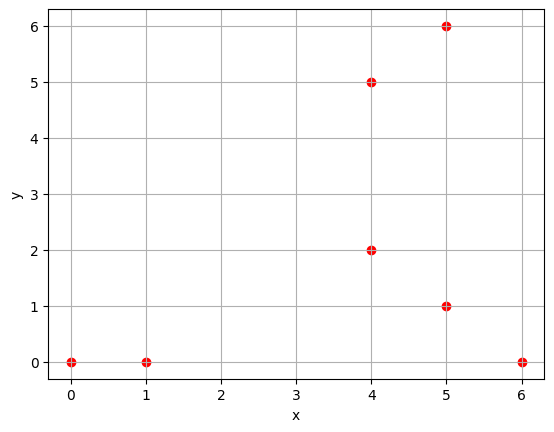

my points:  [[0, 0], [1, 0], [4, 2], [4, 5], [5, 1], [5, 6], [6, 0]]


In [177]:
points = draw(-1, 0, 7)
print("my points: ", points)

In [178]:
for point in points:
    for i in range(len(points)):
        result = multiply(i, point, -1, 7)
        print(result, "for n =", i, "for point ", point)

[nan, nan] for n = 0 for point  [0, 0]
[0, 0] for n = 1 for point  [0, 0]
[nan, nan] for n = 2 for point  [0, 0]
[0, 0] for n = 3 for point  [0, 0]
[0, 0] for n = 4 for point  [0, 0]
[0, 0] for n = 5 for point  [0, 0]
[0, 0] for n = 6 for point  [0, 0]
[nan, nan] for n = 0 for point  [1, 0]
[1, 0] for n = 1 for point  [1, 0]
[nan, nan] for n = 2 for point  [1, 0]
[1, 0] for n = 3 for point  [1, 0]
[1, 0] for n = 4 for point  [1, 0]
[1, 0] for n = 5 for point  [1, 0]
[1, 0] for n = 6 for point  [1, 0]
[nan, nan] for n = 0 for point  [4, 2]
[4, 2] for n = 1 for point  [4, 2]
[1, 0] for n = 2 for point  [4, 2]
[4, 5] for n = 3 for point  [4, 2]
[nan, nan] for n = 4 for point  [4, 2]
[4, 5] for n = 5 for point  [4, 2]
[4, 5] for n = 6 for point  [4, 2]
[nan, nan] for n = 0 for point  [4, 5]
[4, 5] for n = 1 for point  [4, 5]
[1, 0] for n = 2 for point  [4, 5]
[4, 2] for n = 3 for point  [4, 5]
[nan, nan] for n = 4 for point  [4, 5]
[4, 2] for n = 5 for point  [4, 5]
[4, 2] for n = 6 for po

0,0 dwuelementowa
0,1 inna dwuelementowa
4,2 i 4,5 czteroelementowa
5,1  czteroelementowa
5,6 czteroelementowa
6,0 dwuelementowa


krzywa nad ciałem $\mathbb{Z}_5$ o równaniu $y^2=x^3-2x+1$

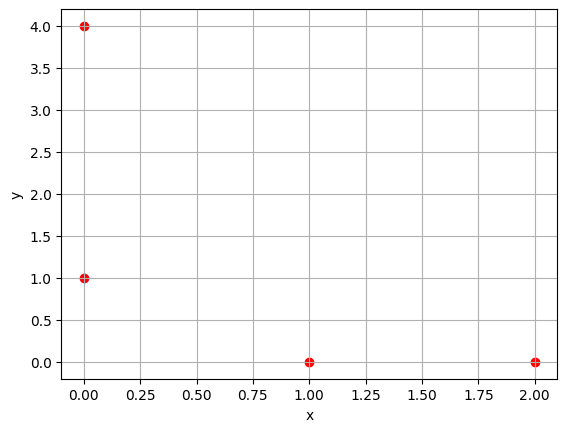

my points:  [[0, 1], [0, 4], [1, 0], [2, 0]]


In [179]:
points = draw(-2, 1, 5)
print("my points: ", points)

In [180]:
for point in points:
    for i in range(len(points)):
        result = multiply(i, point, -2, 5)
        print(result, "for n =", i, "for point ", point)

[nan, nan] for n = 0 for point  [0, 1]
[0, 1] for n = 1 for point  [0, 1]
[1, 0] for n = 2 for point  [0, 1]
[0, 4] for n = 3 for point  [0, 1]
[nan, nan] for n = 0 for point  [0, 4]
[0, 4] for n = 1 for point  [0, 4]
[1, 0] for n = 2 for point  [0, 4]
[0, 1] for n = 3 for point  [0, 4]
[nan, nan] for n = 0 for point  [1, 0]
[1, 0] for n = 1 for point  [1, 0]
[nan, nan] for n = 2 for point  [1, 0]
[1, 0] for n = 3 for point  [1, 0]
[nan, nan] for n = 0 for point  [2, 0]
[2, 0] for n = 1 for point  [2, 0]
[nan, nan] for n = 2 for point  [2, 0]
[2, 0] for n = 3 for point  [2, 0]


0,1 grupa 4-elementowa
0,4 to samo
1,0 grupa 2-elementowa
2,0 to samo
mamy trzy grupy: 4-elementowa i dwie 2-elementowa

## Zadanie 4 (1 pkt)

Sprawdź numerycznie, korzystając z funkcji **gen()**, twierdzenie Hassego. Sprawdź, że ze wzrostem liczby pierwszej $p$ dla krzywej o parametrach $a=-1$, $b=0$ liczba punktów na krzywej podąża za oszacowaniem $p+1-2\sqrt{p}\leq\#E\leq p+1+2\sqrt{p}$. Narysuj wykres $\#E(p)$ i proste o równaniach $p+1-2\sqrt{p}$ oraz $p+1+2\sqrt{p}$.

Uwaga: Możesz wygenerować liczby pierwsze, np. w zakresie od 0 do 1000, za pomocą:

In [181]:
from sympy import primerange
list(primerange(0,1000))

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97,
 101,
 103,
 107,
 109,
 113,
 127,
 131,
 137,
 139,
 149,
 151,
 157,
 163,
 167,
 173,
 179,
 181,
 191,
 193,
 197,
 199,
 211,
 223,
 227,
 229,
 233,
 239,
 241,
 251,
 257,
 263,
 269,
 271,
 277,
 281,
 283,
 293,
 307,
 311,
 313,
 317,
 331,
 337,
 347,
 349,
 353,
 359,
 367,
 373,
 379,
 383,
 389,
 397,
 401,
 409,
 419,
 421,
 431,
 433,
 439,
 443,
 449,
 457,
 461,
 463,
 467,
 479,
 487,
 491,
 499,
 503,
 509,
 521,
 523,
 541,
 547,
 557,
 563,
 569,
 571,
 577,
 587,
 593,
 599,
 601,
 607,
 613,
 617,
 619,
 631,
 641,
 643,
 647,
 653,
 659,
 661,
 673,
 677,
 683,
 691,
 701,
 709,
 719,
 727,
 733,
 739,
 743,
 751,
 757,
 761,
 769,
 773,
 787,
 797,
 809,
 811,
 821,
 823,
 827,
 829,
 839,
 853,
 857,
 859,
 863,
 877,
 881,
 883,
 887,
 907,
 911,
 919,
 929,
 937,
 941,
 947,
 953,
 967,
 971,
 977,
 983,
 991,
 997]

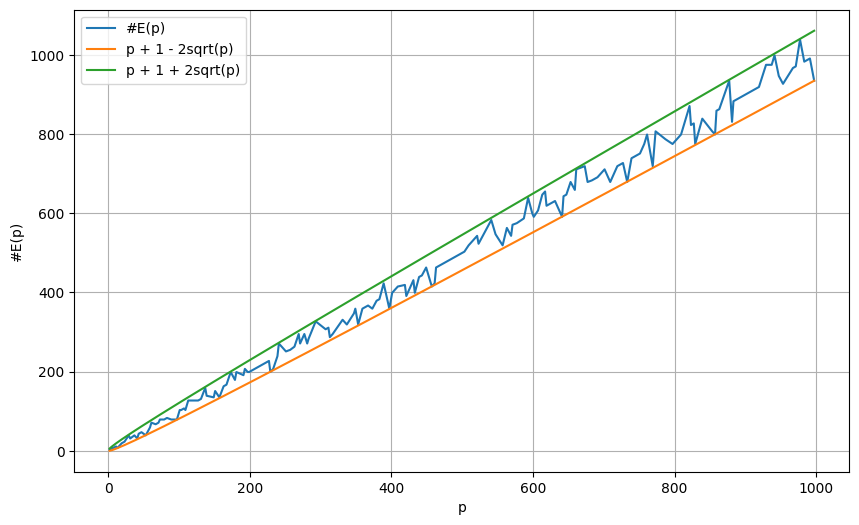

In [182]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import primerange

def check_hasse(a, b, p_max):
    p_values = []
    num_points = []
    lower_bound = []
    upper_bound = []

    for p in primerange(2, p_max+1): #wykorzytuje primerange do generowania liczb pierwszych - ona generuje liczby pierwsze z przedzialu [a,b)
        E = gen(a, b, p) #generujemy liste punktow reprezentujacych krzywa eliptyczna
        num_E = len(E)
        lower = p + 1 - 2 * np.sqrt(p) #zakres dolny dla naszych wartosci
        upper = p + 1 + 2 * np.sqrt(p) #zakres gorny

        p_values.append(p)
        num_points.append(num_E)
        lower_bound.append(lower)
        upper_bound.append(upper)

    plt.figure(figsize=(10, 6))
    plt.plot(p_values, num_points, label='#E(p)')
    plt.plot(p_values, lower_bound, label='p + 1 - 2sqrt(p)')
    plt.plot(p_values, upper_bound, label='p + 1 + 2sqrt(p)')
    plt.xlabel('p')
    plt.ylabel('#E(p)')
    plt.legend()
    plt.grid(True)
    plt.show()

check_hasse(-1, 0, 1000)

lub jakkolwiek inaczej.

## Zadanie 5 (2 pkt.)

Napisz funkcję **ord(G,a,p)** znajdującą rząd punktu $G$ na krzywej o parametrach $a$, $p$ (oznaczenia jak w poprzednich zadaniach). Rząd elementu to $n$ takie, że $nG=\mathcal{O}$. Znajdź punkt na krzywej o parametrach $a=-1$,$b=0$,$p=97$ o największym rzędzie, moze ich być więcej niż jeden, wybierz którykolwiek.

In [183]:
# Definicja funkcji ord(G,a,p)
def ord(G,a,p):
  n = 1
  while True:
      result = multiply(n, G, a, p)
      if np.isnan(result).any():
          return n
      n += 1

In [184]:
print(ord([4,4],-1,11)==3)
print(ord([8,8],-1,11)==6)
print(ord([3,2],-1,7)==3)
print(ord([3,5],-1,7)==3)
print(ord([3,2],0,5)==3)
print(ord([0,0],0,5)==2)

True
True
True
True
True
True


In [185]:
# Znajdź punkt na krzywej y^2 = x^3 - x (mod 97) o największym rzędzie
a = -1
b = 0
p = 97
points = []
points = gen(-1, 0 ,97)
max_order = 0 # Zainicjuj maksymalny rząd jako 0
max_point = None # Zainicjuj maksymalny punkt jako None
for point in points: # Dla każdego punktu na liście
  order = ord(point,a,p) # Oblicz rząd punktu
  if order > max_order: # Sprawdź, czy rząd jest większy niż maksymalny rząd
    max_order = order # Uaktualnij maksymalny rząd
    max_point = point # Uaktualnij maksymalny punkt
print("Punkt o największym rzędzie to", max_point) # Wydrukuj maksymalny punkt
print("Jego rząd to", max_order) # Wydrukuj maksymalny rząd



Punkt o największym rzędzie to [6, 4]
Jego rząd to 20


## Zadanie 6 (1 pkt)

Prześledź działanie protokołu Diffiego-Helmana, jednak tym razem opertego o krzywe eliptyczne, i uzupełnij poszczególne kroki.

Alicja i Bob ustalają publicznie krzywą eliptyczą (czyli parametry $a$, $b$, $p$) w której będą działać oraz punkt na tej krzywej $G$. Weź krzywą z poprzedniego zadania oraz znaleziony w nim punkt.

In [186]:
a = -1
b = 0
G = (6,4)
p = 97

Alicja wybiera losową liczbę naturalną $n$ z przedziału $[2,\#E-1]$, $\#E$ to liczba punktów na krzywej:

In [187]:
import random
E_n = gen(a, b, p) #generujemy liste punktow reprezentujacych krzywa eliptyczna
num_E_n = len(E_n)

n = random.uniform(2, num_E_n-1)
n=int(n)

Następnie oblicza $A=nG$ zgodnie z zasadami mnożenia punktów na krzywej przez liczbe naturalną:

In [188]:
A=multiply(n, G, a, p)

To samo robi Bob, wybiera losową liczbę naturalną $m$ i oblicza $B=mG$:

In [189]:
import random
E_m = gen(a, b, p) #generujemy liste punktow reprezentujacych krzywa eliptyczna
num_E_m = len(E_m)

m = random.uniform(2, num_E_m-1)

In [190]:
m=int(n)
print(m)
B=multiply(m, G, a, p)
print(B)

65
[6, 93]


Liczby $n$ i $m$ są znane tylko, odpowiednio, Alicji i Bobowi, natomiast $A$ oraz $B$ są wymieniane publicznym kanałem. Bob otrzymuje $A$ i wykonuje operację $k_B=mA$, z kolei Alicja otrzymuje $B$ i wykonuje operację $k_A=nB$:

In [191]:
k_B=multiply(m, A, a, p)
k_A=multiply(n, B, a, p)

In [192]:
k_A==k_B

True

Zawuażmy, że $k_A=k_B$, wynika to z tego, że $k_A=nB=nmG$ oraz $k_B=mA=mnG$ a oczywiście $nm=mn$. Zatem Alicja i Bob dysponują tą samą liczbą, którą mogą użyć jako klucz do szyfrowania. Publicznie znane są wartości $a$, $b$, $p$, $G$, $nG$ oraz $mG$, jednak odzyskanie z nich $n$ i $m$ jest bardzo trudne przy odpwiednim doborze krzywej i punktu na niej.